<a href="https://colab.research.google.com/github/sal1717lim/Work_shop_camputer-vision/blob/main/camputer_vision_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"medsalimaissi","key":"ade00eea55deac3aef338bc0196ce829"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
 ! kaggle datasets list

ref                                                         title                                              size  lastUpdated          downloadCount  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              227KB  2021-05-08 09:30:51           4673  
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           2686  
mathurinache/twitter-edge-nodes                             Twitter Edge Nodes                                342MB  2021-03-08 06:43:04            290  
promptcloud/careerbuilder-job-listing-2020                  Careerbuilder Job Listing 2020                     42MB  2021-03-05 06:59:52            651  
dhruvildave/wikibooks-dataset                               Wikibooks Datase

In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 218M/218M [00:03<00:00, 80.1MB/s]



In [ ]:
!mkdir ~/.data/

In [ ]:
!unzip cat-and-dog.zip -d data

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: data/training_set/training_set/cats/cat.3704.jpg  
  inflating: data/training_set/training_set/cats/cat.3705.jpg  
  inflating: data/training_set/training_set/cats/cat.3706.jpg  
  inflating: data/training_set/training_set/cats/cat.3707.jpg  
  inflating: data/training_set/training_set/cats/cat.3708.jpg  
  inflating: data/training_set/training_set/cats/cat.3709.jpg  
  inflating: data/training_set/training_set/cats/cat.371.jpg  
  inflating: data/training_set/training_set/cats/cat.3710.jpg  
  inflating: data/training_set/training_set/cats/cat.3711.jpg  
  inflating: data/training_set/training_set/cats/cat.3712.jpg  
  inflating: data/training_set/training_set/cats/cat.3713.jpg  
  inflating: data/training_set/training_set/cats/cat.3714.jpg  
  inflating: data/training_set/training_set/cats/cat.3715.jpg  
  inflating: data/training_set/training_set/cats/cat.3716.jpg  
  inflating: data/training_

In [ ]:
import tensorflow as tf
training = tf.keras.preprocessing.image_dataset_from_directory(
    './data/training_set/training_set/',
    
    seed=123,
    interpolation='nearest',
    
    batch_size=8,
    image_size=(100,100)
)
test = tf.keras.preprocessing.image_dataset_from_directory(
    './data/test_set/test_set/',
    batch_size=8,
    image_size=(100,100),
    interpolation='nearest',
)

Found 8005 files belonging to 2 classes.
Found 2023 files belonging to 2 classes.


## Model

In [ ]:
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Input,Lambda,Flatten,BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras import Model
import tensorflow as tf
from keras import backend as k
kernel=(3,3)
def Classificateur():
  entree=Input((100,100,3))
  S=Lambda(lambda x:x)(entree)
  C1=Conv2D(16,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(S)
  
  P1=MaxPooling2D((2,2))(C1)
  #P1 = Dropout(0.5)(P1)
  P1 = BatchNormalization()(P1)
  C3=Conv2D(32,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(P1)
  
  P2=MaxPooling2D((2,2))(C3)
  #P2 = Dropout(0.5)(P2)
  P2 = BatchNormalization()(P2)
  C5=Conv2D(64,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(P2)
  
  P3=MaxPooling2D((2,2))(C5)
  #P3 = Dropout(0.5)(P3)
  P3 = BatchNormalization()(P3)
  C7=Conv2D(128,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(P3)
  
  P4=MaxPooling2D((2,2))(C7)
  #P4 = Dropout(0.5)(P4)
  P4 = BatchNormalization()(P4)
  C9=Conv2D(256,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(P4)
  
  P5=MaxPooling2D((2,2))(C9)
  #P5 = Dropout(0.2)(P5)
  P5 = BatchNormalization()(P5)
  C11=Conv2D(512,kernel,activation='relu', kernel_initializer='he_normal', padding='same',kernel_regularizer=regularizers.l1_l2(l1=1e-4, l2=1e-4),)(P5)
  
  P6=MaxPooling2D((2,2))(C11)
  P6=Dropout(0.8)(P6)
  F1=Flatten()(P6)
  D1=Dense(units=500, activation="relu")(F1)
  D3=Dense(units=2, activation="softmax")(D1)
  model=Model(inputs=[entree],outputs=[D3])
  model.compile(optimizer=tf.keras.optimizers.Adam( learning_rate=0.0009), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits='true'), metrics=['accuracy'])
  model.summary()
  return model

model=Classificateur()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 16)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 50, 50, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 32)        0     

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)
LR_Scheduler_loss = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, mode='min',
                                                      min_delta=0.1, cooldown=1, min_lr=0)
checkpointer = tf.keras.callbacks.ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)



Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0



In [ ]:
hist=model.fit(training,validation_data=test,
                     batch_size=8,
                     epochs=15,
                     callbacks=[LR_Scheduler_loss,checkpointer]
                     )

Epoch 1/15
1001/1001 [==============================] - 54s 23ms/step - loss: 6.3486 - accuracy: 0.5524 - val_loss: 4.5096 - val_accuracy: 0.5966

Epoch 00001: val_loss improved from inf to 4.50959, saving model to model-dsbowl2018-1.h5
Epoch 2/15
1001/1001 [==============================] - 23s 23ms/step - loss: 4.1515 - accuracy: 0.5994 - val_loss: 3.0677 - val_accuracy: 0.6105

Epoch 00002: val_loss improved from 4.50959 to 3.06766, saving model to model-dsbowl2018-1.h5
Epoch 3/15
1001/1001 [==============================] - 24s 24ms/step - loss: 2.7609 - accuracy: 0.6614 - val_loss: 2.0619 - val_accuracy: 0.7049

Epoch 00003: val_loss improved from 3.06766 to 2.06194, saving model to model-dsbowl2018-1.h5
Epoch 4/15
1001/1001 [==============================] - 24s 24ms/step - loss: 1.9354 - accuracy: 0.6939 - val_loss: 1.6061 - val_accuracy: 0.7474

Epoch 00004: val_loss improved from 2.06194 to 1.60611, saving model to model-dsbowl2018-1.h5
Epoch 5/15
1001/1001 [==================

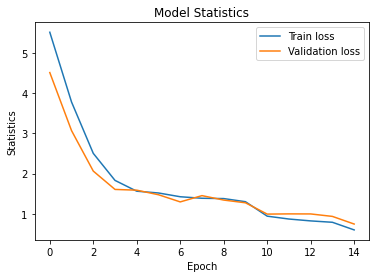

In [ ]:
from matplotlib import pyplot as plt
def model_results(history):

    # Plot training & validation loss values
    plt.plot(history.history['loss'], label = 'Train loss')
    plt.plot(history.history['val_loss'], label = 'Validation loss')

    #plt.plot(history.history['dice_coef'], label = 'Train dice ')
   # plt.plot(history.history['val_dice_coef'], label = 'Validation dice ')

    plt.legend(loc="best")
    plt.title('Model Statistics')
    plt.ylabel('Statistics')
    plt.xlabel('Epoch')
    
    plt.show()
model_results(hist)

# Segmentation

In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"medsalimaissi","key":"f4c89c0494c27fcbaa930b944afb4b73"}'}

In [ ]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d intelecai/car-segmentation

 99% 439M/442M [00:21<00:00, 15.5MB/s]
100% 442M/442M [00:21<00:00, 22.0MB/s]


In [ ]:
!mkdir ~/.car/

In [ ]:
!unzip car-segmentation.zip -d car

Archive:  car-segmentation.zip
  inflating: car/car-segmentation/classes.txt  
  inflating: car/car-segmentation/images/003.png  
  inflating: car/car-segmentation/images/105618339-super-purple-modern-suv-car-side-view.png  
  inflating: car/car-segmentation/images/105618639-modern-pale-blue-suv-car-side-view.png  
  inflating: car/car-segmentation/images/156551_preview.png  
  inflating: car/car-segmentation/images/178583_Side_Profile_Web.png  
  inflating: car/car-segmentation/images/1965-Shelby-Cobra-Roadster-Side-Profile.png  
  inflating: car/car-segmentation/images/2008-Morgan-Life-Car-Side-Speed-1024x768.png  
  inflating: car/car-segmentation/images/2009-Ford-Kuga-Show-Car-Side-1280x960.png  
  inflating: car/car-segmentation/images/2011-278656-pagani-huayra-side-view1.png  
  inflating: car/car-segmentation/images/2015_aston_martin_db10_4.png  
  inflating: car/car-segmentation/images/2018-bm4-gt4-sports-car-side-view-pk.png  
  inflating: car/car-segmentation/images/2018-niss

In [ ]:
import os
if not os.path.exists("./input"):
  !mkdir ./input
  !mkdir ./input/train
  !mkdir ./input/test
  !mkdir ./input/train/image
  !mkdir ./input/train/mask
  !mkdir ./input/test/image
  !mkdir ./input/test/mask
TRAIN_PATH = './input/train/'
TEST_PATH = './input/test/'


In [ ]:
import shutil
#partition train test
init="./car/car-segmentation"
liste_images=os.listdir(init+"/images")
for index in range (len(liste_images)):
  if index<int(len(liste_images)*0.8):
    shutil.move(init+"/images/"+liste_images[index],TRAIN_PATH+"image/"+liste_images[index])
    shutil.move(init+"/masks/"+liste_images[index],TRAIN_PATH+"mask/"+liste_images[index])
  else:
    shutil.move(init+"/images/"+liste_images[index],TEST_PATH+"image/"+liste_images[index])
    shutil.move(init+"/masks/"+liste_images[index],TEST_PATH+"mask/"+liste_images[index])
print("nombre d'images de train:"+str(len(os.listdir("./input/train/image"))))
print("nombre d'images de test:"+str(len(os.listdir("./input/test/image"))))


nombre d'images de train:168
nombre d'images de test:43


In [ ]:
import os
import cv2
import numpy as np
from numpy.random import randint
import random
def flip(rgb_path,  gt_path):
    rgb_images = os.listdir(rgb_path)
    
    gt_images = os.listdir(gt_path)

    entries = list(zip(rgb_images, gt_images))
    total = len(entries)
    actuel = 1

    for entry in entries:

        rgb = cv2.imread(rgb_path + "/" + entry[0], cv2.IMREAD_UNCHANGED)
        
        gt = cv2.imread(gt_path + "/" + entry[1], cv2.IMREAD_UNCHANGED)
        # rotation 90 degres rgb depth gt (clockwise)
        img_rotate_90 = cv2.rotate(rgb, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(rgb_path + "/flip90" + entry[0], img_rotate_90)

        

        gt_rotate_90 = cv2.rotate(gt, cv2.ROTATE_90_CLOCKWISE)
        cv2.imwrite(gt_path + "/flip90" + entry[1], gt_rotate_90)

        # rotation 270 degres rgb depth gt (clockwise)
        img_rotate_270 = cv2.rotate(rgb, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(rgb_path + "/flip270" + entry[0], img_rotate_270)

       

        gt_rotate_270 = cv2.rotate(gt, cv2.ROTATE_90_COUNTERCLOCKWISE)
        cv2.imwrite(gt_path + "/flip270" + entry[1], gt_rotate_270)

        # rotation 180 degres rgb depth gt (clockwise)
        img_rotate_180 = cv2.rotate(rgb, cv2.ROTATE_180)
        cv2.imwrite(rgb_path + "/flip180" + entry[0], img_rotate_180)

        gt_rotate_180 = cv2.rotate(gt, cv2.ROTATE_180)
        cv2.imwrite(gt_path + "/flip180" + entry[1], gt_rotate_180)

        print(str(actuel)+"/"+str(total))
        actuel += 1
    print("fin")

flip("./input/train/image", "./input/train/mask")

1/168
2/168
3/168
4/168
5/168
6/168
7/168
8/168
9/168
10/168
11/168
12/168
13/168
14/168
15/168
16/168
17/168
18/168
19/168
20/168
21/168
22/168
23/168
24/168
25/168
26/168
27/168
28/168
29/168
30/168
31/168
32/168
33/168
34/168
35/168
36/168
37/168
38/168
39/168
40/168
41/168
42/168
43/168
44/168
45/168
46/168
47/168
48/168
49/168
50/168
51/168
52/168
53/168
54/168
55/168
56/168
57/168
58/168
59/168
60/168
61/168
62/168
63/168
64/168
65/168
66/168
67/168
68/168
69/168
70/168
71/168
72/168
73/168
74/168
75/168
76/168
77/168
78/168
79/168
80/168
81/168
82/168
83/168
84/168
85/168
86/168
87/168
88/168
89/168
90/168
91/168
92/168
93/168
94/168
95/168
96/168
97/168
98/168
99/168
100/168
101/168
102/168
103/168
104/168
105/168
106/168
107/168
108/168
109/168
110/168
111/168
112/168
113/168
114/168
115/168
116/168
117/168
118/168
119/168
120/168
121/168
122/168
123/168
124/168
125/168
126/168
127/168
128/168
129/168
130/168
131/168
132/168
133/168
134/168
135/168
136/168
137/168
138/168
139/

In [ ]:
import numpy as np
import cv2 as cv
import tensorflow as tf
( IMG_HEIGHT, IMG_WIDTH)=(128,128)
class Custom_Generator(tf.keras.utils.Sequence):
    def __init__(self, rgb_path, gt_path, batch_size):
        self.batch_size = batch_size
        self.length = len(os.listdir(rgb_path))

        self.rgb_path = rgb_path
        
        self.gt_path = gt_path
        self.indexes = np.arange(self.length)
        self.on_epoch_end()

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)

    def __len__(self):
        return int(np.floor(self.length / self.batch_size))

    def __getitem__(self, index):
        indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        x = np.empty((self.batch_size, IMG_HEIGHT, IMG_WIDTH, 3))
        
        y = np.empty((self.batch_size, IMG_HEIGHT, IMG_WIDTH,4))

        cpt = 0

        for i in indexes:
            rgb_input = cv.imread(self.rgb_path + "/" + os.listdir(self.rgb_path)[i])
            rgb_input= cv.resize(rgb_input, ( IMG_HEIGHT, IMG_WIDTH))/255
            gt_input = cv.imread(self.gt_path + "/" + os.listdir(self.gt_path)[i], 0)
            gt_input =  cv.resize(gt_input, ( IMG_HEIGHT, IMG_WIDTH))
            z = np.zeros(( IMG_HEIGHT, IMG_WIDTH,4))
            for i in range(gt_input.shape[0]):
              for j in range(gt_input.shape[1]):
                if gt_input[i][j]==1:
                  z[i][j][0]=1
                if gt_input[i][j]==2:
                  z[i][j][1]=1
                if gt_input[i][j]==3:
                  z[i][j][2]=1
                if gt_input[i][j]==4:
                  z[i][j][3]=1

            x[cpt, ] = rgb_input

            y[cpt, ] = z
            cpt += 1
        return x, y

## Model

In [ ]:
def dice_coef(y_true, y_pred):
    y_true_f = k.flatten(y_true)
    y_pred_f = k.flatten(y_pred)
    intersection = k.sum(y_true_f * y_pred_f)
    return (2.0 * intersection + 1.0) / (k.sum(y_true_f) + k.sum(y_pred_f) + 1.0)
def dice_coef_multilabel(y_true, y_pred, numLabels=4):
    dice=0
    for index in range(numLabels):
        dice += dice_coef(y_true[:,:,:,index], y_pred[:,:,:,index])
    return dice/numLabels # taking average
def dice_coef_loss(y_true, y_pred):
    return 1-dice_coef(y_true, y_pred)
def dice_coef_loss_m(y_true, y_pred):
    return 1-dice_coef_multilabel(y_true, y_pred)
def dice_coef_l1(y_true, y_pred):
  return dice_coef(y_true[:,:,:,0], y_pred[:,:,:,0])
def dice_coef_l2(y_true, y_pred):
  return dice_coef(y_true[:,:,:,1], y_pred[:,:,:,1])
def dice_coef_l3(y_true, y_pred):
  return dice_coef(y_true[:,:,:,2], y_pred[:,:,:,2])
def dice_coef_l4(y_true, y_pred):
  return dice_coef(y_true[:,:,:,3], y_pred[:,:,:,3])

In [ ]:
import keras
from keras.models import Model, load_model
from keras.layers import Input,Add, BatchNormalization
from keras.layers.core import Dropout, Lambda
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as k
import tensorflow as tf
def multi_class_UNET(nbclass,IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS):
  inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  s = Lambda(lambda x: x / 255) (inputs)

  c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (s)
  c1 = Dropout(0.1) (c1)
  c1 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c1)
  p1 = MaxPooling2D((2, 2)) (c1)
  p1 = Dropout(0.5)(p1)
  p1 = BatchNormalization()(p1)
  c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p1)
  c2 = Dropout(0.1) (c2)
  c2 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c2)
  p2 = MaxPooling2D((2, 2)) (c2)
  p2 = Dropout(0.5)(p2)
  p2 = BatchNormalization()(p2)
  c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p2)
  c3 = Dropout(0.2) (c3)
  c3 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c3)
  p3 = MaxPooling2D((2, 2)) (c3)
  p3 = Dropout(0.5)(p3)
  p3 = BatchNormalization()(p3)
  c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p3)
  c4 = Dropout(0.2) (c4)
  c4 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c4)
  p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
  p4 = Dropout(0.5)(p4)
  p4 = BatchNormalization()(p4)
  c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (p4)
  c5 = Dropout(0.3) (c5)
  c5 = BatchNormalization()(c5)
  c5 = Conv2D(256, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c5)

  u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same') (c5)
  u6 = concatenate([u6, c4])
  c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u6)
  c6 = Dropout(0.2) (c6)
  c6 = BatchNormalization()(c6)
  c6 = Conv2D(128, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c6)

  u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same') (c6)
  u7 = concatenate([u7, c3])
  c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u7)
  c7 = Dropout(0.2) (c7)
  c7 = BatchNormalization()(c7)
  c7 = Conv2D(64, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c7)

  u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same') (c7)
  u8 = concatenate([u8, c2])
  c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u8)
  c8 = Dropout(0.1) (c8)
  c8 = BatchNormalization()(c8)
  c8 = Conv2D(32, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c8)

  u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same') (c8)
  u9 = concatenate([u9, c1], axis=3)
  c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (u9)
  c9 = Dropout(0.1) (c9)
  c9 = Conv2D(16, (3, 3), activation='elu', kernel_initializer='he_normal', padding='same') (c9)

  outputs = Conv2D(nbclass, (1, 1), activation='softmax') (c9)

  model = Model(inputs=[inputs], outputs=[outputs])
  #binary_crossentropy
  model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss=dice_coef_loss_m, metrics=[dice_coef_l1,dice_coef_l2,dice_coef_l3,dice_coef_l4])
  model.summary()
  return model
m=multi_class_UNET(4,128, 128,3)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 128, 128, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
dropout (Dropout)               (None, 128, 128, 16) 0           conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1
config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU
config.log_device_placement = True  # to log device placement (on which device the operation ran)
sess = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(sess)
LR_Scheduler_loss = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                                                      min_delta=0.1, cooldown=1, min_lr=0)
earlystopper = EarlyStopping(patience=3, verbose=1)
checkpointer = ModelCheckpoint('model-dsbowl2018-1.h5', verbose=1, save_best_only=True)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



In [ ]:
results = m.fit(Custom_Generator(TRAIN_PATH+"image",TRAIN_PATH+"mask",8), validation_data=Custom_Generator(TEST_PATH+"image",TEST_PATH+"mask",1), validation_steps=1, 
                              steps_per_epoch=int(np.floor((len(os.listdir(TRAIN_PATH+"image")) / 8)),),
                              epochs=100,
                               callbacks = [checkpointer])

Epoch 1/100
84/84 [==============================] - 141s 1s/step - loss: 0.8035 - dice_coef_l1: 0.4326 - dice_coef_l2: 0.2945 - dice_coef_l3: 0.0093 - dice_coef_l4: 0.0494 - val_loss: 0.9655 - val_dice_coef_l1: 3.7275e-04 - val_dice_coef_l2: 0.1184 - val_dice_coef_l3: 0.0190 - val_dice_coef_l4: 3.4537e-04

Epoch 00001: val_loss improved from inf to 0.96549, saving model to model-dsbowl2018-1.h5
Epoch 2/100
84/84 [==============================] - 106s 1s/step - loss: 0.6559 - dice_coef_l1: 0.6382 - dice_coef_l2: 0.6676 - dice_coef_l3: 0.0057 - dice_coef_l4: 0.0648 - val_loss: 0.9950 - val_dice_coef_l1: 1.4691e-04 - val_dice_coef_l2: 8.5690e-04 - val_dice_coef_l3: 0.0177 - val_dice_coef_l4: 0.0011

Epoch 00002: val_loss did not improve from 0.96549
Epoch 3/100
84/84 [==============================] - 107s 1s/step - loss: 0.5861 - dice_coef_l1: 0.6677 - dice_coef_l2: 0.6968 - dice_coef_l3: 0.0104 - dice_coef_l4: 0.2807 - val_loss: 0.8471 - val_dice_coef_l1: 0.5991 - val_dice_coef_l2: 0.

In [ ]:
m.load_weights("model-dsbowl2018-1.h5")

In [ ]:
res=m.predict(Custom_Generator(TEST_PATH+"image",TEST_PATH+"mask",1))


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

print(res.shape)

def drawsegmentation(input):
  image=np.empty((input.shape[0],input.shape[1],3))
  for i in range(input.shape[0]):
    for j in range(input.shape[1]):
      if input[i][j][0]==1:
        image[i,j,:]=(255,0,0)
      if input[i][j][1]==1:
        image[i,j,:]=(0,255,0)
      if input[i][j][2]==1:
        image[i,j,:]=(0,0,0)
     
      if input[i][j][3]==1:
        image[i,j,:]=(0,0,255)

      
    



  return image




(1, 128, 128, 4)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

<Figure size 432x288 with 0 Axes>

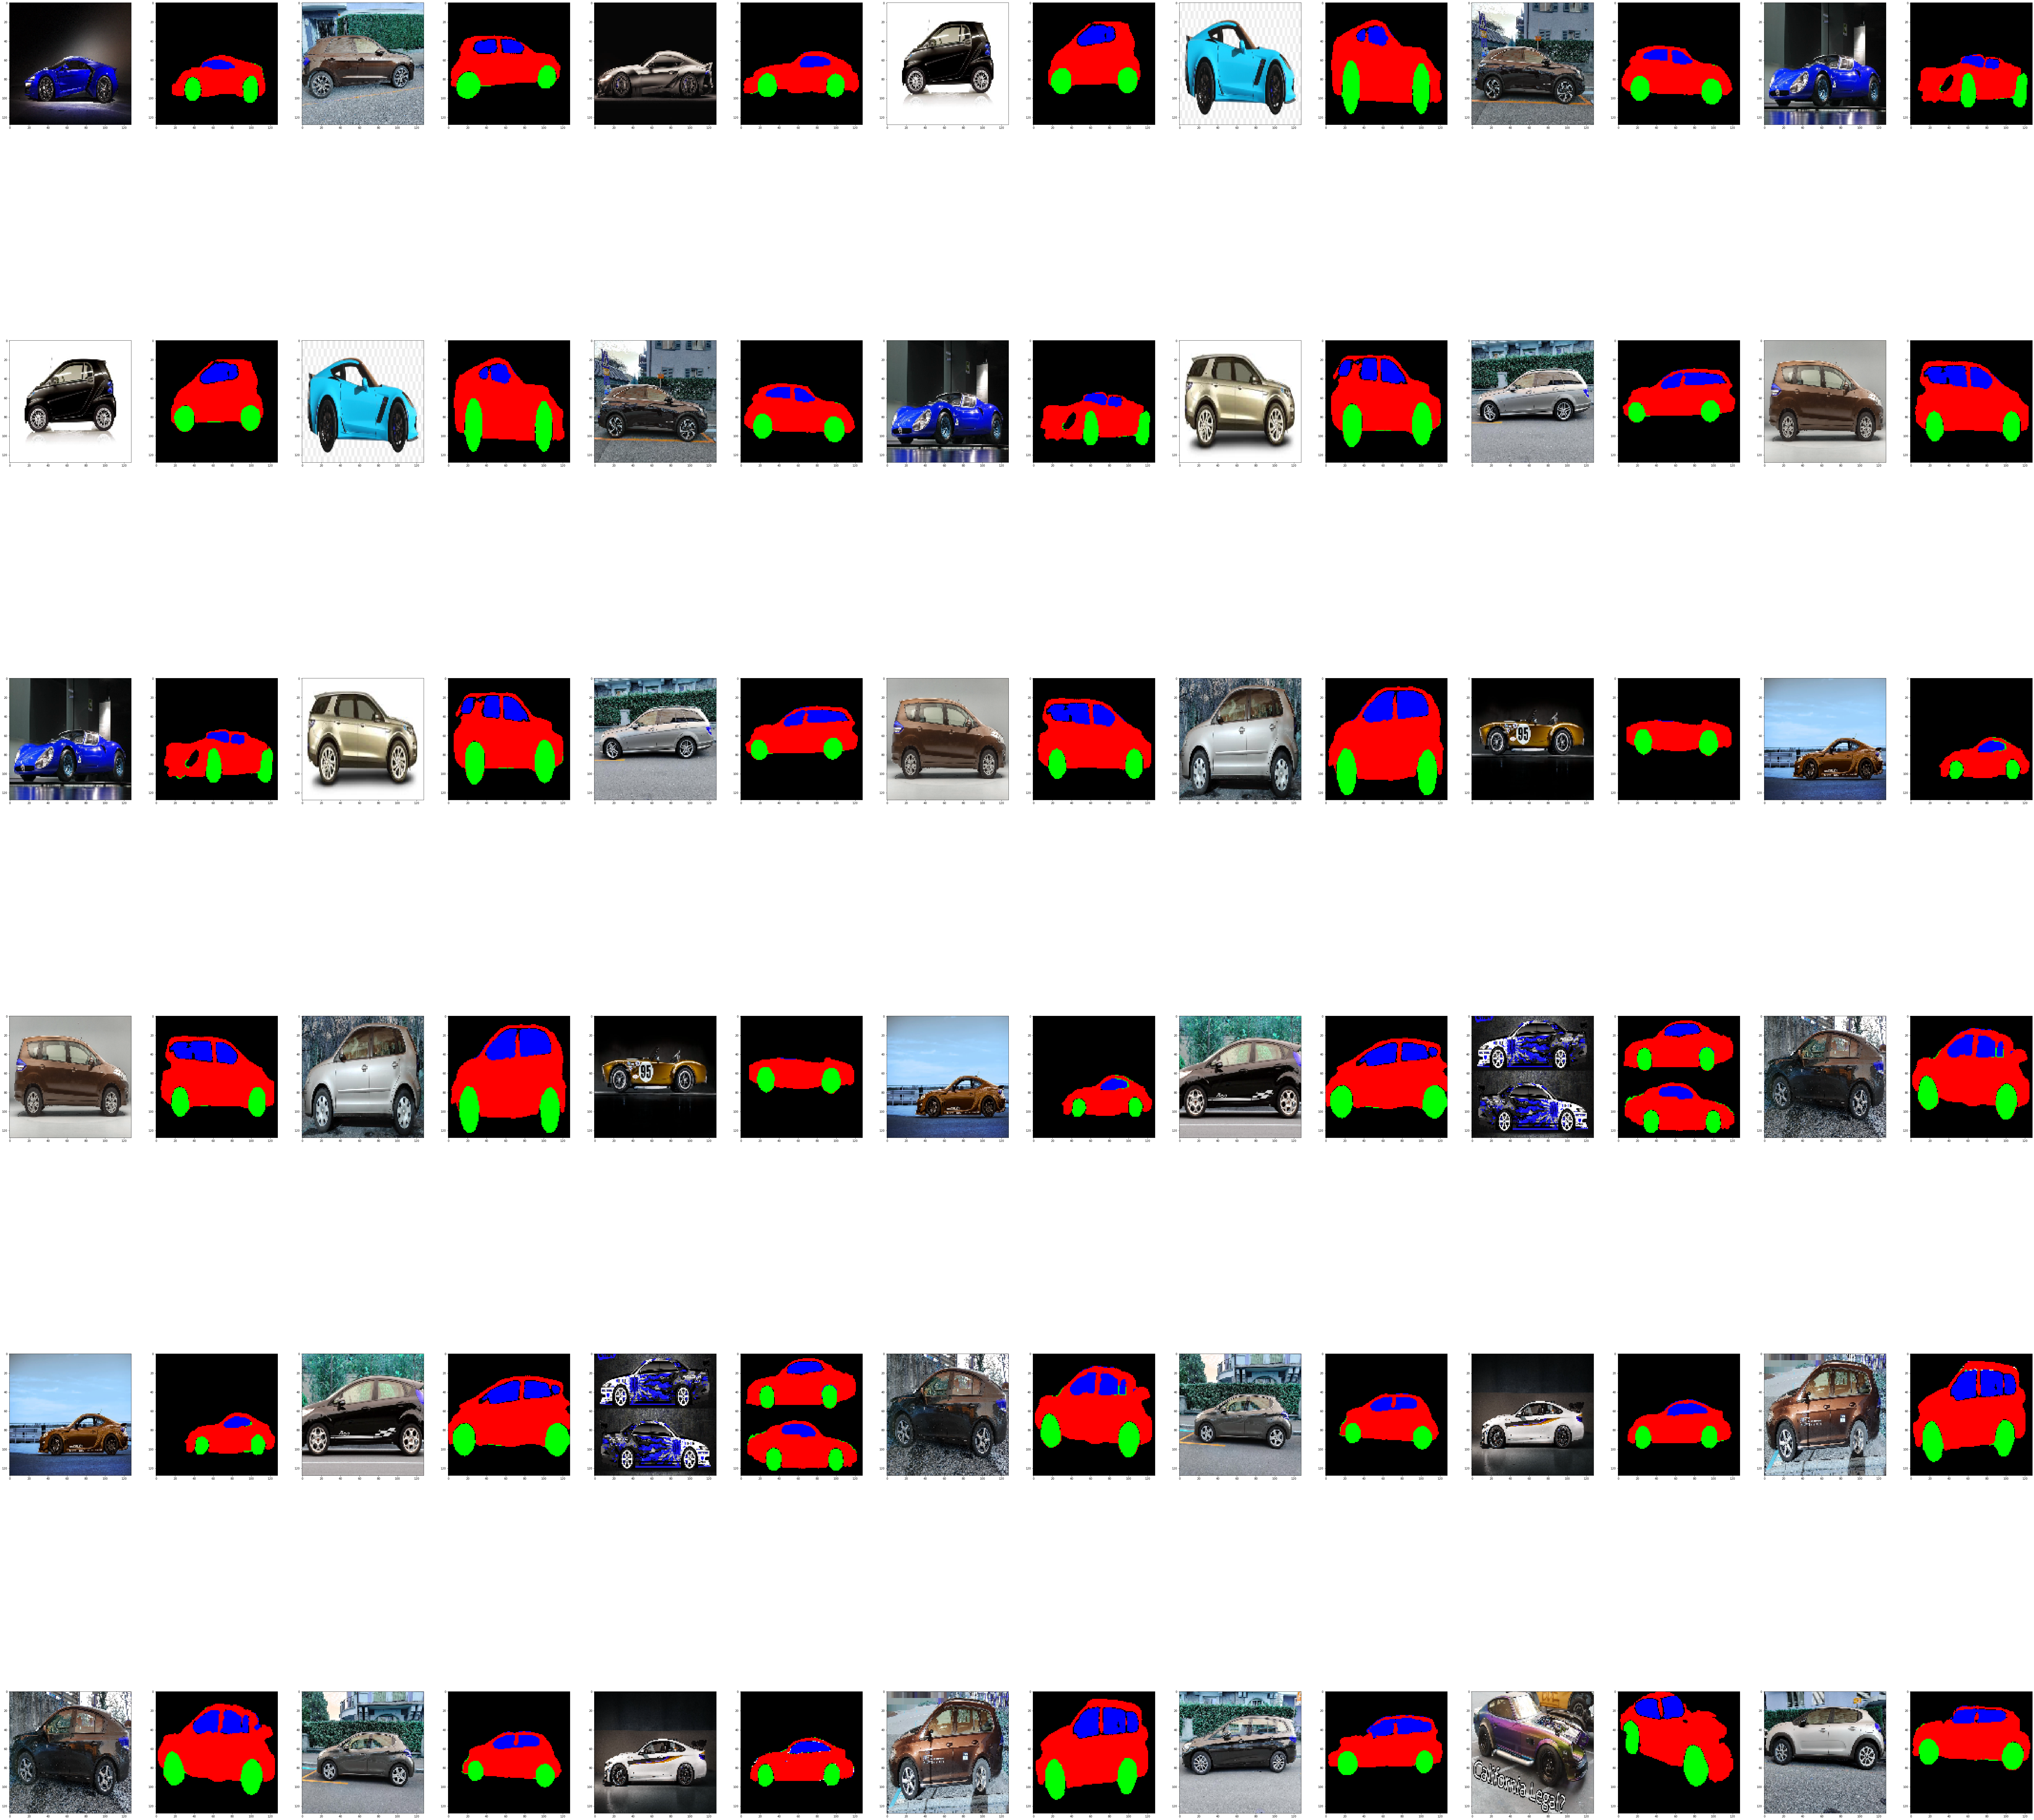

In [ ]:
import cv2 as cv
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(6,14,figsize=(128,128)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
images=os.listdir("input/test/image")
for i in range(6):
  for j in range(0,14,2):
    image=cv.imread("input/test/image/"+images[i*6+j])
    image=cv.resize(image,(128,128))/255
    image = np.expand_dims(image, axis=0)
    res=m.predict(image)
    axarr[i][j].imshow(image[0])
    axarr[i][j+1].imshow(drawsegmentation(res[0]))
